# **Titanic Survival Prediction**
---
                                                                 Name : VISHNU E
                                                                 Organization : CodSoft
                                                                 Date : 08/12/2024

## **Problem Statement**
---

 To build a machine learning model to predict passenger survival on the Titanic based on features like age, gender, and ticket class. It provides a hands-on opportunity to explore data preprocessing, feature engineering, and classification techniques.

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Exploratory Data Analysis

In [ ]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# statistical summary of the dataframe

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# checking for null values

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

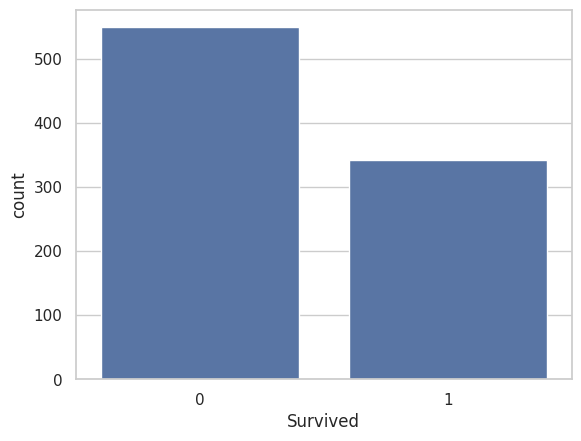

In [ ]:
# 'Survived' column distribution

print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

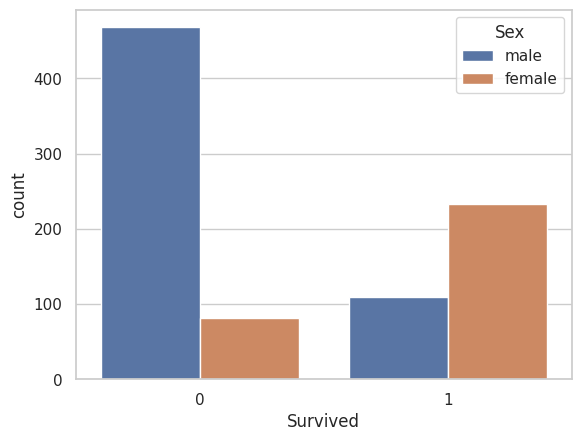

In [ ]:
# 'Survived' column distribution based on 'Sex'

sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

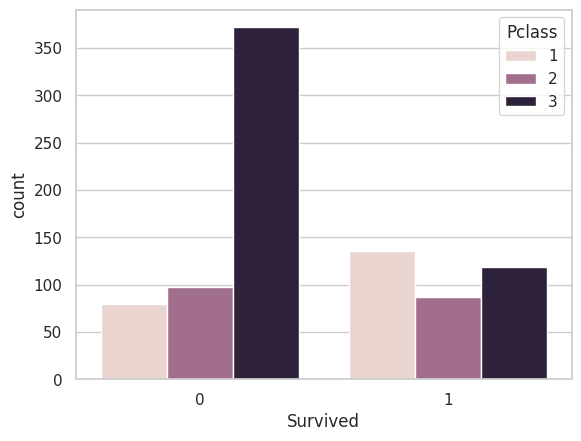

In [ ]:
# 'Survived' column distribution based on Passenger class

sns.countplot(x='Survived', hue='Pclass', data=df)

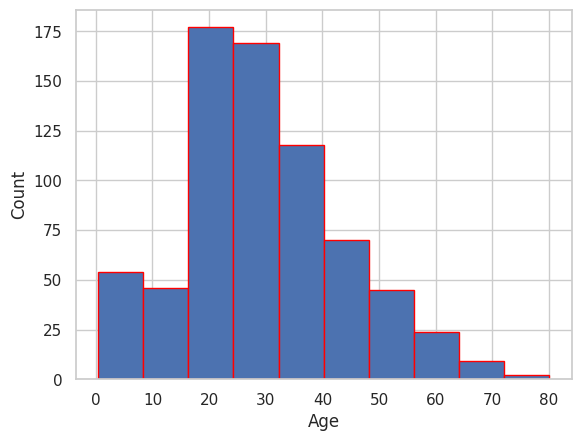

In [ ]:
# histogram of 'Age'

import matplotlib.pyplot as plt
plt.hist(df['Age'].dropna(), edgecolor='red') # droping the null values of age and plot the histogram
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

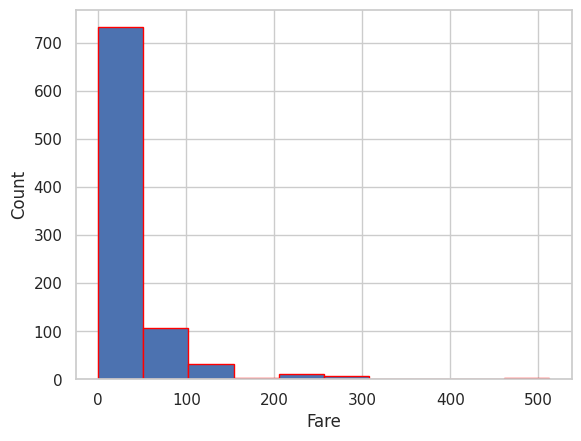

In [ ]:
# histogram of 'Fare'

import matplotlib.pyplot as plt
plt.hist(df['Fare'], edgecolor='red')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

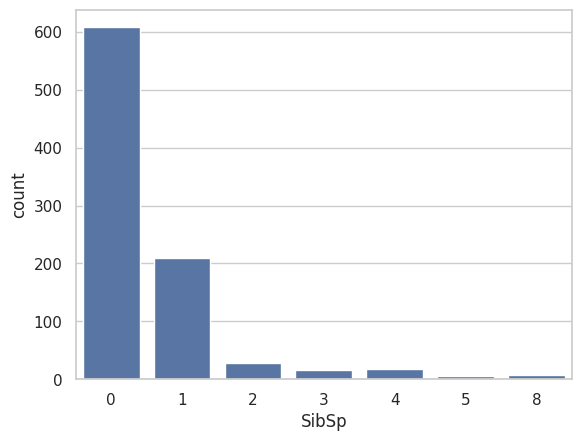

In [ ]:
# 'SibSp' distribution

sns.countplot(x='SibSp',data=df) # SibSp -- is the number of sibling and spouse.

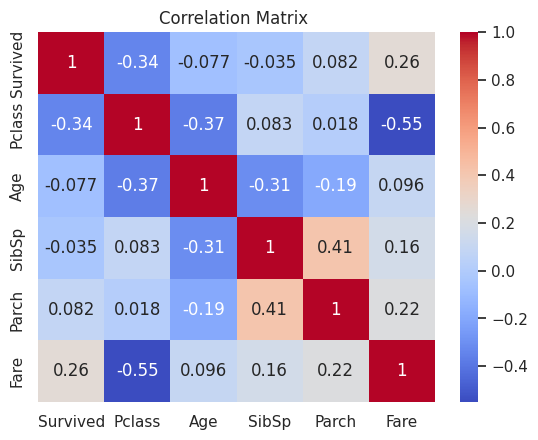

In [ ]:
# Correlation matrix of numerical features

numerical_columns =df[['Survived','Pclass','Age','SibSp','Parch','Fare']]
sns.heatmap(numerical_columns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix ")
plt.show()

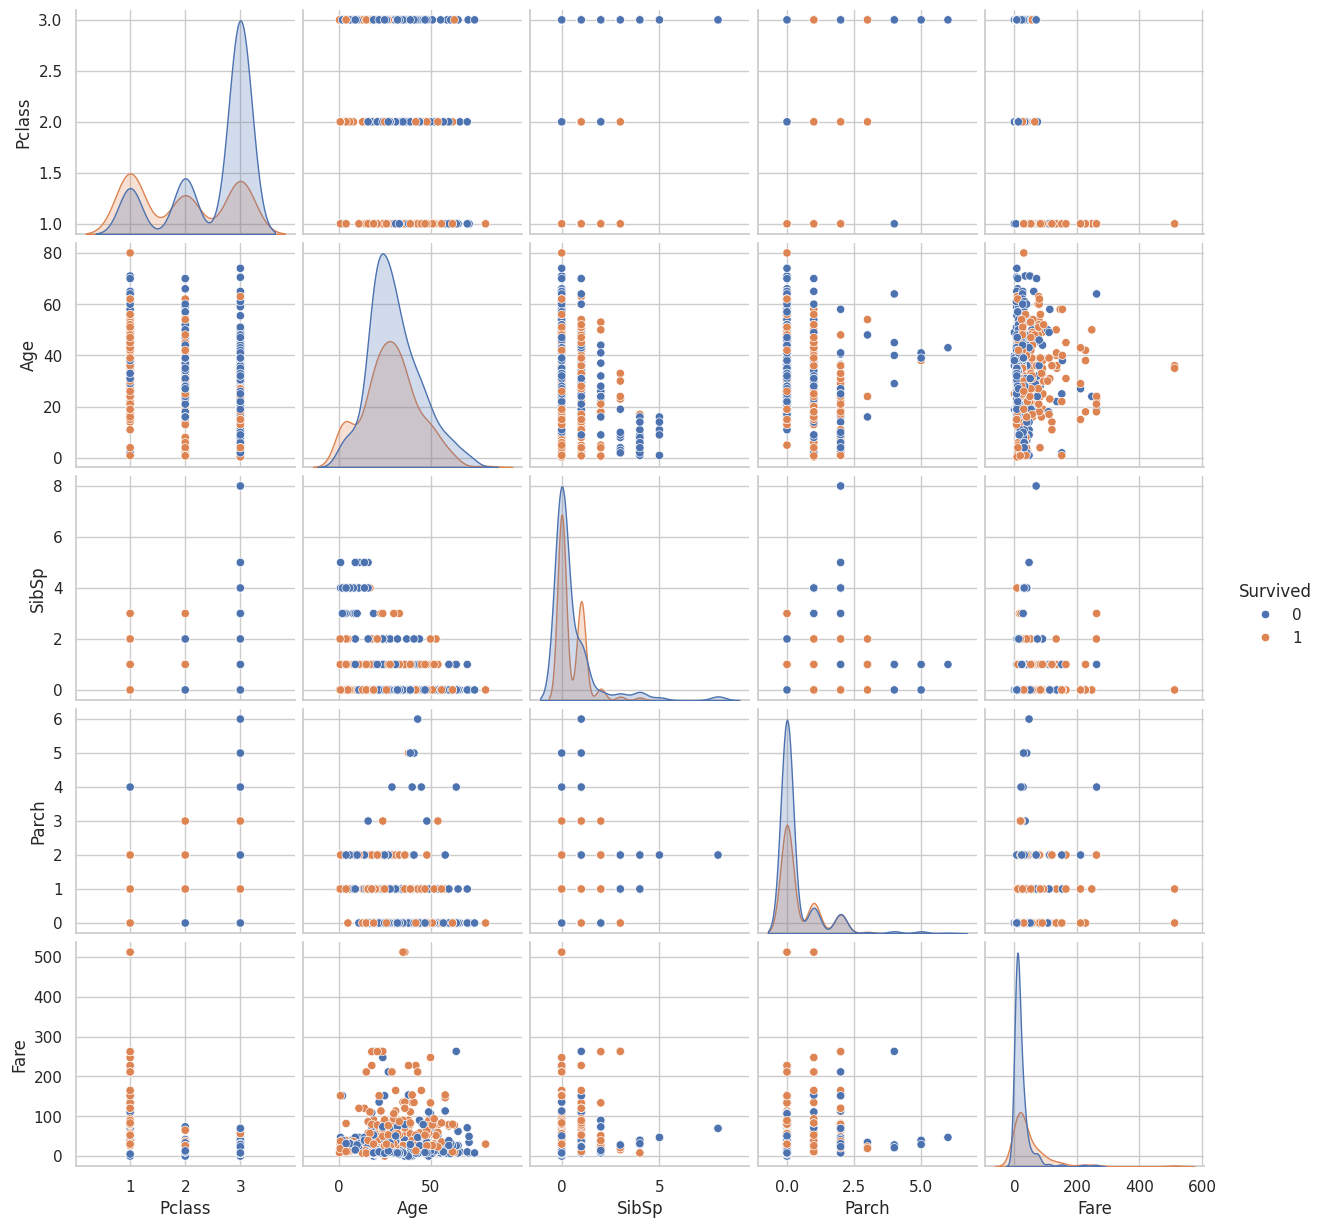

In [ ]:
# Pair plot of features

sns.pairplot(numerical_columns, hue="Survived")
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

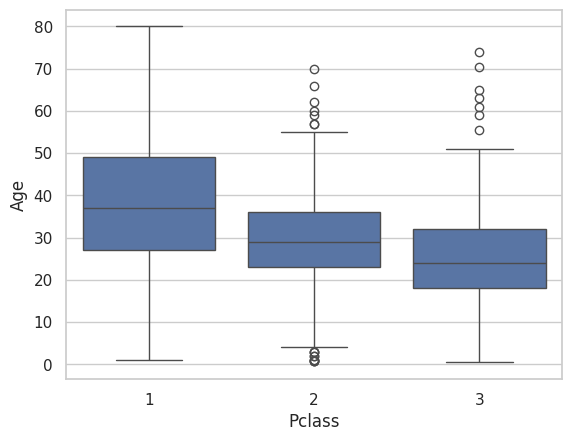

In [ ]:
# to remove the null vales
# we have to change the null values of age, embarked and cabin

# While analysing the data (from heat map), it is found that age and passenger class have a correlation( negative correlation)
# therefore we have to undarstand which age value is suitable for corresponding passenger class (we are looking for the average)

sns.boxplot(x='Pclass',y='Age',data=df)


In [ ]:
# from the box plot we can see the average value of pclass1=37, pclass2=28 and pclass3=24
# so we are going to write a program code -- defining a function

def age_imputer(cols):
    Age = cols[0] # fist column
    Pclass = cols[1] # second column

    if pd.isnull(Age): # if age is null

        if Pclass==1: # in passenger class 1
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24

    else: # if age is not null
        return Age

In [ ]:
# now applying this function on age column

df['Age'] = df[['Age','Pclass']].apply(age_imputer, axis=1) # using apply function changing the Age column

<ipython-input-117-d611addcacbc>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0] # fist column
<ipython-input-117-d611addcacbc>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1] # second column


In [ ]:
# checking null values again

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# droping unnecessary columns

df.drop(columns=['Cabin','Ticket','PassengerId','Name'], inplace=True)

In [ ]:
# droping null values

df.dropna(inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# changing the categorical variable columns(sex and embarked) using one hot encoder

sex = pd.get_dummies(df['Sex'], drop_first=True,dtype=int)
embarked = pd.get_dummies(df['Embarked'], drop_first=True,dtype=int)

# droping old Sex and Embarked columns

df.drop(columns=['Sex','Embarked'], inplace=True)

# concatenating new sex and embarked columns

df_new = pd.concat([df,sex,embarked],axis=1)
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


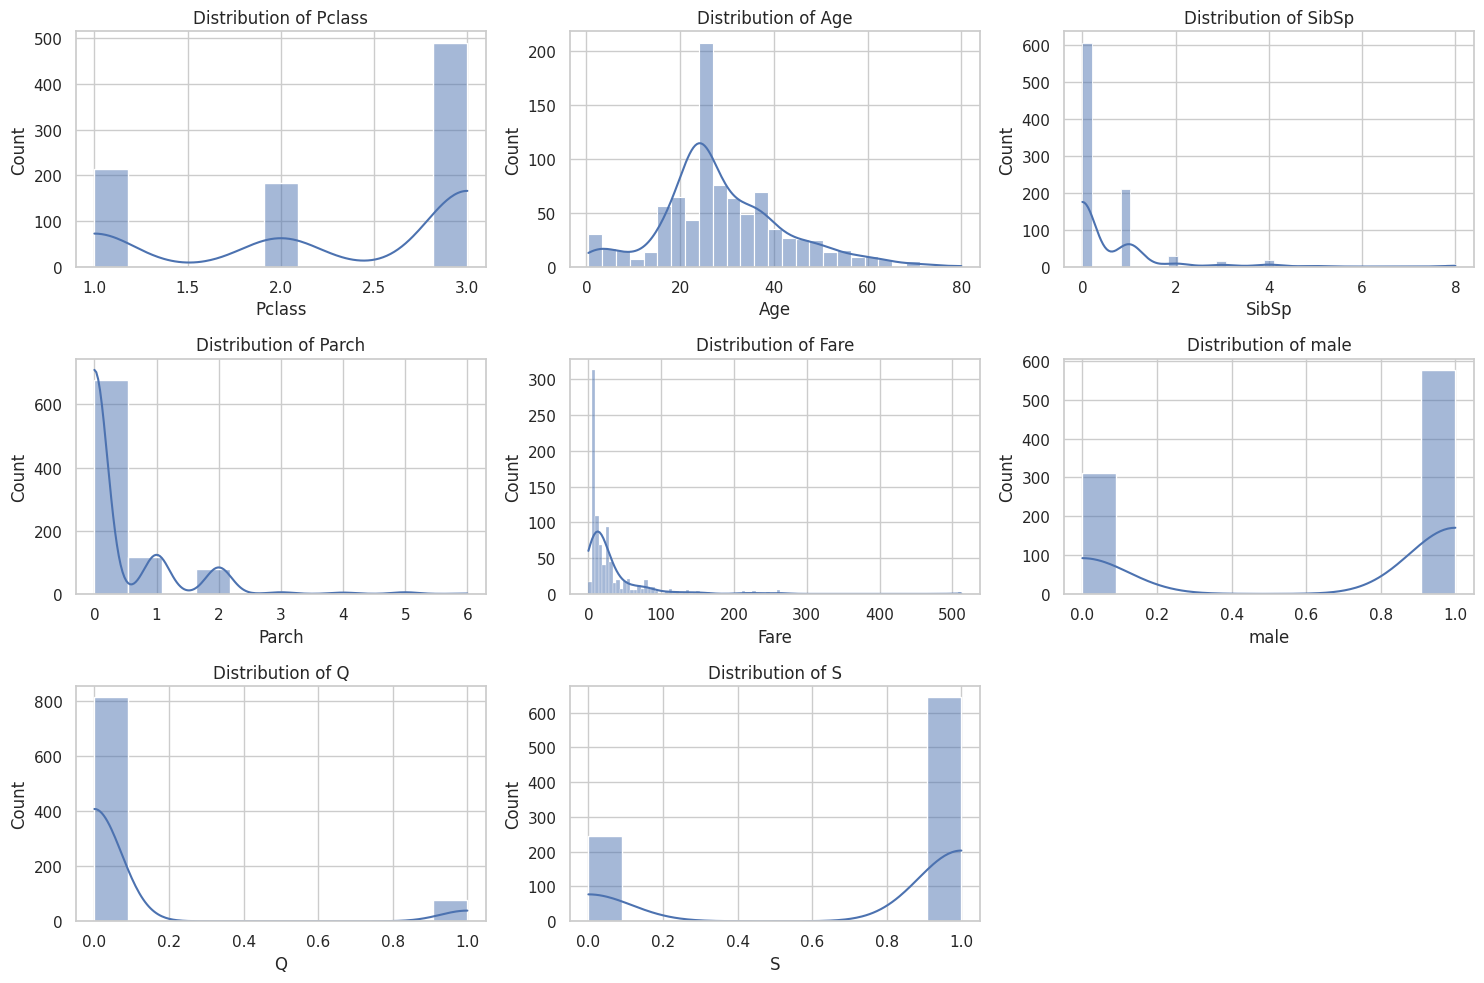

In [ ]:
# Plot the distribution of all variables

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler,MinMaxScaler

X = df_new.drop(columns='Survived')
y = df_new['Survived']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
# model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report



X_val = X_scaled
Y_val = y

X_train, X_test, y_train, y_test = train_test_split(X_val,Y_val, test_size = 0.2, random_state = 301)

results = []

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_metrics = {
    'Model': 'Logistic Regression',
    'Test Accuracy': accuracy_score(y_test, lr_pred),
    'Train Accuracy': accuracy_score(y_train, lr_model.predict(X_train)),
    'Precision': precision_score(y_test, lr_pred),
    'Recall': recall_score(y_test, lr_pred),
    'F1 score': f1_score(y_test, lr_pred),
    'Train confusion matrix': confusion_matrix(y_train, lr_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, lr_pred)

}
results.append(lr_metrics)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Test Accuracy': accuracy_score(y_test, rf_pred),
    'Train Accuracy': accuracy_score(y_train, rf_model.predict(X_train)),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1 score': f1_score(y_test, rf_pred),
    'Train confusion matrix': confusion_matrix(y_train, rf_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, rf_pred)

}
results.append(rf_metrics)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_metrics = {
    'Model': 'Decision Tree',
    'Test Accuracy': accuracy_score(y_test, dt_pred),
    'Train Accuracy': accuracy_score(y_train, dt_model.predict(X_train)),
    'Precision': precision_score(y_test, dt_pred),
    'Recall': recall_score(y_test, dt_pred),
    'F1 score': f1_score(y_test, dt_pred),
    'Train confusion matrix': confusion_matrix(y_train, dt_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, dt_pred)
}
results.append(dt_metrics)

#  KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_metrics = {
    'Model': 'KNN Classifier',
    'Test Accuracy': accuracy_score(y_test, knn_pred),
    'Train Accuracy': accuracy_score(y_train, knn_model.predict(X_train)),
    'Precision': precision_score(y_test, knn_pred),
    'Recall': recall_score(y_test, knn_pred),
    'F1 score': f1_score(y_test, knn_pred),
    'Train confusion matrix': confusion_matrix(y_train, knn_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, knn_pred)
}
results.append(knn_metrics)

# Ada Boost
ad_model = AdaBoostClassifier()
ad_model.fit(X_train, y_train)
ad_pred = ad_model.predict(X_test)
ad_metrics = {
    'Model': 'Ada boost classifier',
    'Test Accuracy': accuracy_score(y_test, ad_pred),
    'Train Accuracy': accuracy_score(y_train, ad_model.predict(X_train)),
    'Precision': precision_score(y_test, ad_pred),
    'Recall': recall_score(y_test, ad_pred),
    'F1 score': f1_score(y_test, ad_pred),
    'Train confusion matrix': confusion_matrix(y_train, ad_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, ad_pred)
}
results.append(ad_metrics)


# Create DataFrame for results
results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Test Accuracy,Train Accuracy,Precision,Recall,F1 score,Train confusion matrix,Test confusion matrix
0,Logistic Regression,0.842697,0.796062,0.777778,0.724138,0.750000,"[[366, 63], [82, 200]]","[[108, 12], [16, 42]]"
1,Random Forest,0.808989,0.984529,0.706897,0.706897,0.706897,"[[426, 3], [8, 274]]","[[103, 17], [17, 41]]"
2,Decision Tree,0.769663,0.984529,0.634921,0.689655,0.661157,"[[428, 1], [10, 272]]","[[97, 23], [18, 40]]"
3,KNN Classifier,0.831461,0.864979,0.741379,0.741379,0.741379,"[[387, 42], [54, 228]]","[[105, 15], [15, 43]]"
4,Ada boost classifier,0.865169,0.835443,0.793103,0.793103,0.793103,"[[379, 50], [67, 215]]","[[108, 12], [12, 46]]"
